# Lab 2

## Outline of topics:

1. Hints for the field capacity problem.
2. Hints for the Chutes and Ladders Game.
3. Hints for the Line Reverser problem.
4. 


## In lab later on the assigned work is:

1. Write a simple character, word, and line count function ...
2. Make a two-player chutes and ladders game ...


In [ ]:
# Import packages ...
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Field Capacity Problem

The formula for field capacity is `C = S*W*E/8.25` where the units of C are acres/hour and
* S = tractor speed in mph
* W = width of implement in feet
* E = efficiency of swath (a fraction between 0 and 1)

Let `E = 0.85`.

Let `S` range from 3 to 7 in 0.5 mph increments

Let `W` range from 10 to 60 in 10 foot increments

Code a capacity estimator using a nested set of `for` loops and the print command. You might want to try using `f-strings` to format a decent looking table.

In [ ]:
S = np.linspace(3,7,9);
W = np.linspace(10,60,6)

In [ ]:
print(S)
print(W)

In [ ]:
for x in S:
    for y in W:
        print(x, ' ', y, ' what is the field capacity')

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="300"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

### Following is a function which rolls the die and computes the new position of a player.

In [ ]:
# This needs to be included for the random drawing of numbers from
# 1 to 6 simulating the throw of a die.
import random
from random import Random

random.seed(a=None,version=2)

# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

# HW Problem: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

If you have time convert your single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, if you still can't sleep explore how changes to the positions of chutes and ladders might change the game.

In [ ]:
CandL_make_a_move(1,CandLTable)

In [ ]:
CandL_make_a_move(3,CandLTable)

In [ ]:
P1 = np.array([0])

p1 = 0

while (p1 < 100):
    p1 = CandL_make_a_move(p1, CandLTable)
    P1 = np.append(P1, p1)


# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(P1,'*')
plt.grid()


## Hint on Line Reverser

The function is to take an input string of arbitrary length as its input and return as output the string in reverse order.

For example: 

1. If the input string is `bananas` then the output should be `sananab`.
2. If the input string is `But here's my number, so call me, maybe` then the output should be `ebyam ,em llac os ,rebmun ym s'ereh tuB`

In [ ]:
# Skeleton

def anameforyourfunction(instring):
    initialize output string
    for loop ...
    pre-pend to output string
    return the output string

# Test it on 'bananas' ...

anameforyourfunction('bananas')

# Reverse longline variable ...

backwardslongline = anameforyourfunction(longline)


In [ ]:
# Here are some useful ideas ...
instring = 'But here\'s my number, so call me, maybe'; # notice the backslash!

In [ ]:
instring

In [ ]:
# instring is an array of characters and we can address them with the notation ...
instring[0]

In [ ]:
# We can find the length of instring using the command
len(instring)

In [ ]:
i = 0;
while i < len(instring):
    print(instring[i])
    i = i + 1;

In [ ]:
# What if I wanted to go in reverse?

j = len(instring) - 1;
while j >= 0:
    print(instring[j])
    j = j - 1;

From Andrew Balmos ....

# Project: Fetching data from ThingsBoard

[ThingsBoard](https://thingsboard.io/) is a service that accepts, processes, stores and visualizes data streams. We use it to store and plot IoT data from LoRaWAN sensors in the [Purdue OATS DataStation (POD)](https://github.com/oats-center/pod) project.

In this notebook, we will go through programmatically fetching data from the ThingsBoard from a real POD deployed on Professor Buckmaster's home farm.

Let us begin by importing some useful libraries that will be used throughout the notebook. Those are:
1. requests: Makes HTTP requests. We will use it to grab data from ThingsBoard.
2. pandas: A popular tool for doing data analysis in python.
3. matplotlib: A tool for making graphical plots.
4. pprint: A python module for printing variables nicely.

_Note:_ I set the matplotlib style to “seaborn” because I like it better. It is not required and you are welcome to adjust it to your liking.

In [ ]:
import requests
import pandas as pd
import pprint

# Logging in

To log into ThingsBoard as an application, you must make an HTTP request that trades a valid username / password combination for a so-called token. 

The token is equivalent to the username and password, but it does not actually contain the user's password, and it is time limited. This design has slight higher security posture because third party applications (like this notebook) do not have to store the users' password (and therefore can not accidentally leak it).

_**Note: If the below API calls start to fail while working with this notebook, your token may have timed out. You simply need to run the below block again**_

In [ ]:
url="https://pod-buckmaster.oatscenter.org"
username="blahblah@oatscenter.org"
password="yablahblah"

In [ ]:
# Fetch 
resp = requests.post(f"{url}/api/auth/login", json={
            "username": username,
            "password": password
        }).json()


In [ ]:
print(resp)

In [ ]:
# Keep the token around
token = resp['token']

# Fetching the available time series for a specific device

It is a bit complex (but possible if needed) to fetch all available devices with the ThingsBoard API. So to simplify things for this demonstration, please just log into the ThingsBoard UI, navigate to the "Devices" page, select the device of interest, and then choose "Copy device id". 

Finally, paste the copied value into the `device_id` variable below.

In [ ]:
device_id = "32bb7330-b1e7-11ec-8f23-8d2bc3d3b81e" # oyster-EBA3 (A GPS tracker)

keys = requests.get(f"{url}/api/plugins/telemetry/DEVICE/{device_id}/keys/timeseries",
                 headers={
                     'content-type': 'application/json',
                     'x-authorization': f"bearer {token}"
                 }).json()

In [ ]:
print(keys)

# Fetching a time series of interest

In this case, I selected an Oyster GPS device and I want to plot the device's battery and vehicles speed over time. So I choose `data_battery_voltage` and `data_speed_kmph`.

In [ ]:
key = ['data_battery_voltage', 'data_speed_kmph', 'data_lat_deg', 'data_lon_deg']
start = 1650427200000 # Use: https://www.epochconverter.com/ to convert your desired date to a "Timestamp in milliseconds"
stop = 1650740223000 # Use: https://www.epochconverter.com/ to convert your desired date to a "Timestamp in milliseconds"
limit = 100000 # Maximum number of points to return. By default this value is small. If you want everything, set to something large.

data = requests.get(f"{url}/api/plugins/telemetry/DEVICE/{device_id}/values/timeseries",
             headers={
                 'content-type': 'application/json',
                 'x-authorization': f"bearer {token}"
             },
            params= {
                'keys': key,
                'startTs': start,
                'endTs': stop,
                'limit': limit,
                'agg': 'NONE'
            }).json()

In [ ]:
type(data)

In [ ]:
print(data)

In [ ]:
len(data['data_speed_kmph'])

In [ ]:
data['data_speed_kmph'][0]

In [ ]:
data['data_lat_deg']

In [ ]:
time = np.array([0]);
voltage = np.array([0]);
lats = np.array([0]);
lons = np.array([0]);
lattimes = np.array([0]);
lontimes = np.array([0]);


for x in data['data_battery_voltage']:
    time = np.append(time, x['ts'])
    voltage = np.append(voltage, x['value'])
    print(x['ts'], x['value'])
    
time = np.delete(time,0)
voltage = np.delete(voltage,0)

for y in data['data_lat_deg']:
    lats = np.append(lats, y['value'])
    lattimes = np.append(lattimes, y['ts'])
    
for z in data['data_lon_deg']:
    lons = np.append(lons, z['value'])
    lontimes = np.append(lontimes, z['ts'])
    
lats = np.delete(lats,0)
lons = np.delete(lons,0)
lattimes = np.delete(lattimes,0)
lontimes = np.delete(lontimes,0)
    

In [ ]:
time.shape

In [ ]:
plt.plot(time, voltage)

In [ ]:
plt.plot(lontimes,lons,'*')

In [ ]:
plt.plot(lattimes,lats,'*')

In [ ]:
plt.plot(lats,lons,'*')

In [ ]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(lons, lats, '.')
plt.title("Example Plot")
plt.xlabel("lons")
plt.ylabel("lats")
plt.grid()

In [ ]:
# Parse voltage
## Convert the raw Python map to a Pandas DataFrame
Lon = pd.DataFrame(data['data_lon_deg'])

## Convert from string to float
Lon["value"] = Lon["value"].astype(float)

## ThingsBoard API calls the value timeseries "value", rename it to "voltage" for our sanity
Lon.rename( columns={'value': 'longitude'}, inplace=True)

## Convert the date "string" into a real Pandas date object (enables some Pandas niceties)
Lon['ts'] = pd.to_datetime(Lon['ts'], unit='ms')

# Tell Pandas to use the "ts" column as the index ... the x-axis of our plots and queries
Lon.set_index('ts', inplace=True)
    
# Parse speed

## Convert the raw Python map to a Pandas DataFrame
Lat = pd.DataFrame(data['data_lat_deg'])

## Convert from string to float and MPH
Lat["value"] = Lat["value"].astype(float)

## ThingsBoard API calls the value timeseries "value", rename it to "speed_kmph" for our sanity
Lat.rename(columns={'value': 'lattitude'}, inplace=True)

## Convert the date "string" into a real Pandas date object (enables some Pandas niceties)
Lat['ts'] = pd.to_datetime(Lat['ts'], unit='ms')

# Tell Pandas to use the "ts" column as the index ... the x-axis of our plots and queries
Lat.set_index('ts', inplace=True)

## Combine the two into one common DataFrame
oyster = pd.concat([Lat, Lon], axis=1, join="inner")

oyster

In [ ]:
oyster.plot.scatter(x='longitude',y='lattitude')

Player 1 has won 6 games and Player 2 has won 9 games


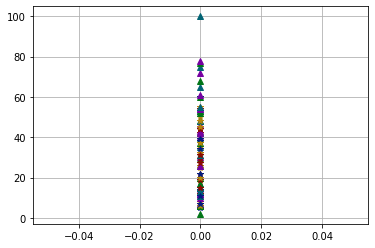

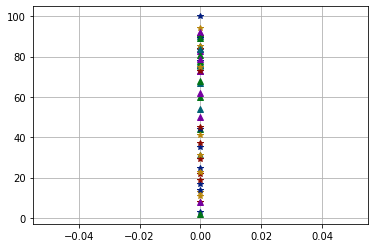

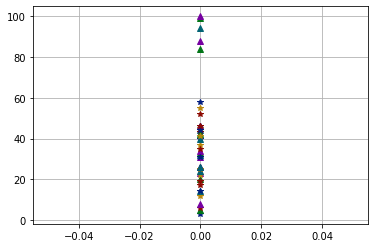

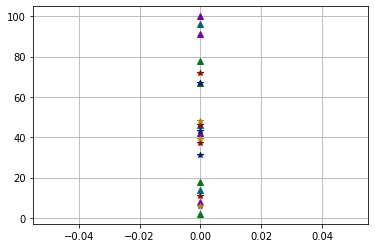

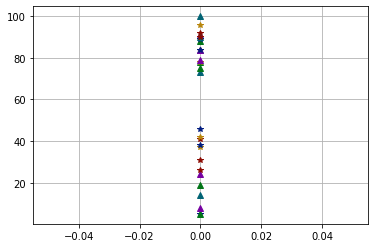

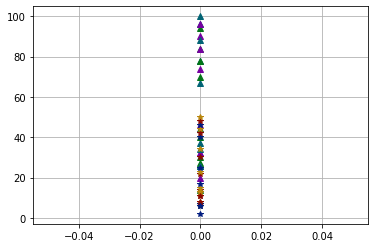

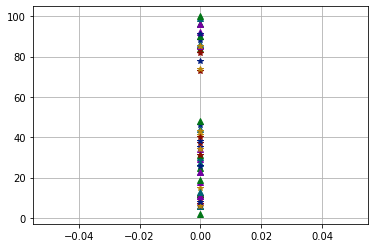

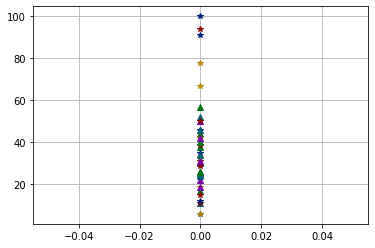

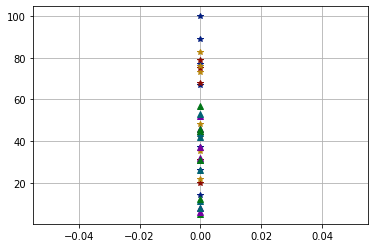

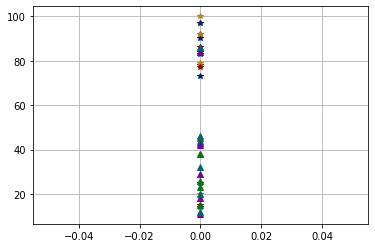

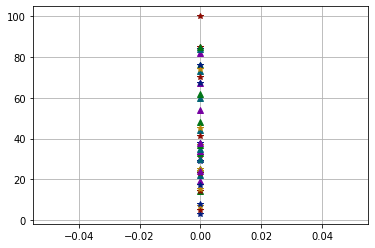

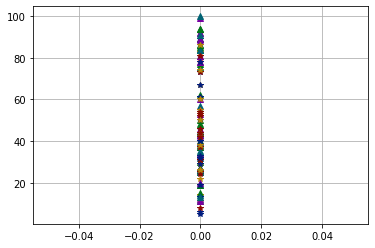

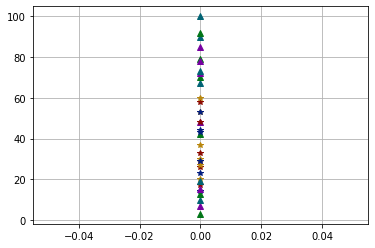

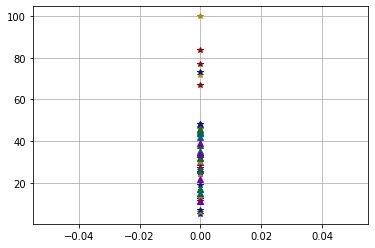

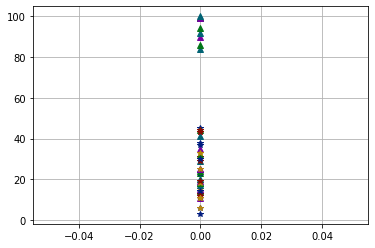

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import random
from random import Random

random.seed(a=None,version=2)

CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67, 56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

def CandL_make_a_move(position,CandLTable):
    
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

def game(p1_score, p2_score):
    
    P1 = np.array([0])
    p1 = 0 
    
    
    P2 = np.array([0])
    p2 = 0
    
    
    fig3 = plt.figure()
    plt.style.use('seaborn-dark-palette')
    plt.grid()
    
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        P1 = np.append(P1, p1)
        p2 = CandL_make_a_move(p2, CandLTable)
        P2 = np.append(P2, p2)
        
        plt.plot(p1,'*')
        plt.plot(p2, '^')
        
    if p1 >=100:
        p1_score +=1
    if p2 >=100:
        p2_score +=1
        
    return p1_score, p2_score

def main():
    p1_score = 0 
    p2_score = 0 
    for i in range(15):
        p1_score, p2_score = game(p1_score, p2_score)
    print("Player 1 has won", p1_score, "games and Player 2 has won", p2_score, "games")
    
main()